In [1]:
import numpy as np
import pandas as plt
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, regularizers

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test)= cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

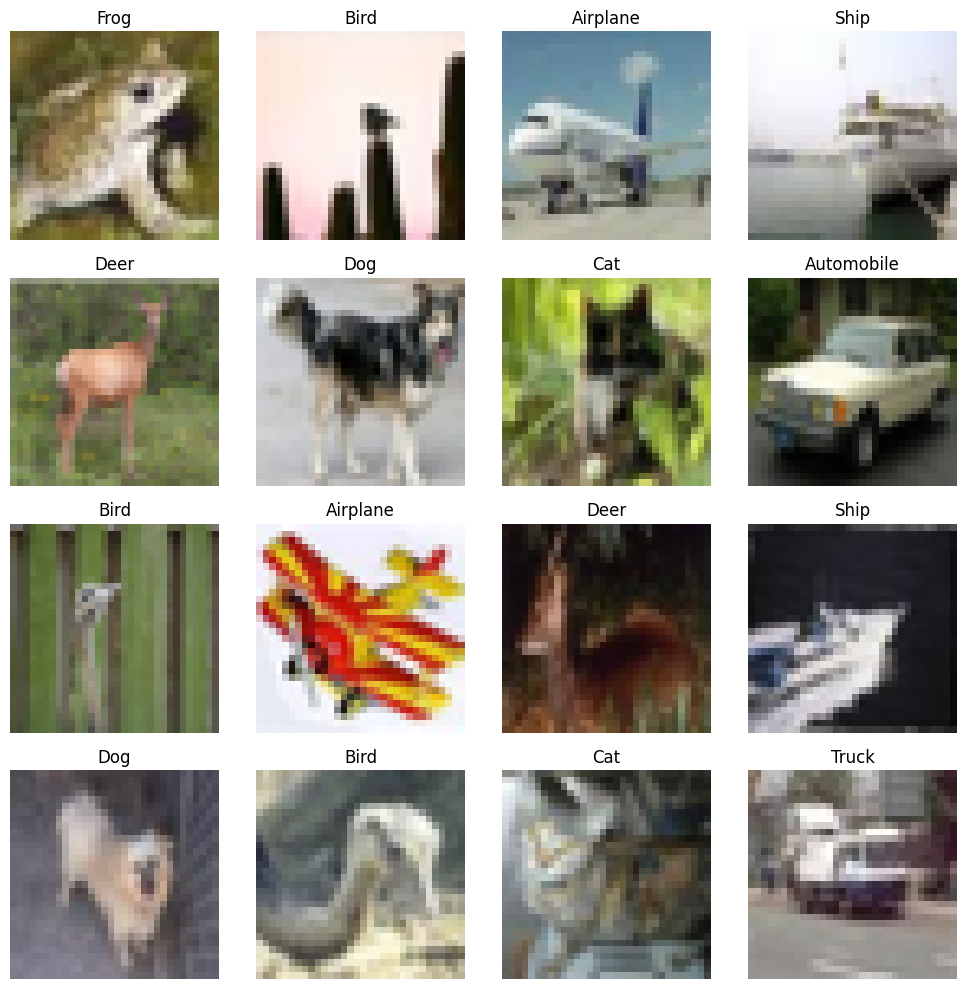

In [3]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


fig, axs = plt.subplots(4, 4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(4):
  for j in range(4):
    random_int = np.random.randint(0, 50001)
    label = y_train[random_int][0]
    axs[i,j].imshow(x_train[random_int])
    axs[i,j].set_title(class_names[label])
    axs[i,j].axis('off')
plt.tight_layout()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

In [5]:
 # number of classes
k = len(set(y_train))
k

10

In [6]:
# Set the random seed for reproducibility
tf.random.set_seed(45)

# Create the Sequential model
model = Sequential([
    Input(shape=x_train[0].shape),

    Conv2D(32, (3, 3), activation='relu', padding ='same'),
    BatchNormalization(),

    Conv2D(32, (3, 3), padding ='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding ='same', activation='relu'),
    BatchNormalization(),

    Conv2D(64, (3, 3), padding ='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding ='same', activation='relu'),
    BatchNormalization(),

    Conv2D(128, (3, 3), padding ='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),


    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(k, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
epochs = 10
r = model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 22s 8ms/step - loss: 1.3325 - accuracy: 0.5435 - val_loss: 1.3342 - val_accuracy: 0.5859
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8879 - accuracy: 0.6949 - val_loss: 0.8485 - val_accuracy: 0.7124
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7237 - accuracy: 0.7533 - val_loss: 0.7835 - val_accuracy: 0.7470
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6108 - accuracy: 0.7928 - val_loss: 0.7393 - val_accuracy: 0.7643
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5125 - accuracy: 0.8248 - val_loss: 0.7090 - val_accuracy: 0.7767
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4337 - accuracy: 0.8502 - val_loss: 0.6084 - val_accuracy: 0.8086
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3626 - accuracy: 0.8775 - val_loss: 0.7474 - val_ac

In [8]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True
                                    )
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit_generator(train_generator, validation_data=(x_test, y_test),
                        steps_per_epoch=steps_per_epoch,
                        epochs=5)

Epoch 1/5


<ipython-input-8-d4dfc8e99b09>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test, y_test),


1562/1562 [==============================] - 35s 22ms/step - loss: 0.6238 - accuracy: 0.7960 - val_loss: 0.5619 - val_accuracy: 0.8150
Epoch 2/5
1562/1562 [==============================] - 33s 21ms/step - loss: 0.5331 - accuracy: 0.8207 - val_loss: 0.5489 - val_accuracy: 0.8155
Epoch 3/5
1562/1562 [==============================] - 38s 24ms/step - loss: 0.4968 - accuracy: 0.8322 - val_loss: 0.5194 - val_accuracy: 0.8281
Epoch 4/5
1562/1562 [==============================] - 33s 21ms/step - loss: 0.4723 - accuracy: 0.8415 - val_loss: 0.4888 - val_accuracy: 0.8370
Epoch 5/5
1562/1562 [==============================] - 33s 21ms/step - loss: 0.4479 - accuracy: 0.8474 - val_loss: 0.5154 - val_accuracy: 0.8303


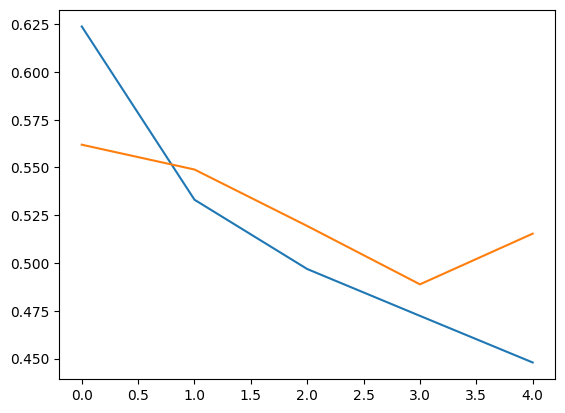

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

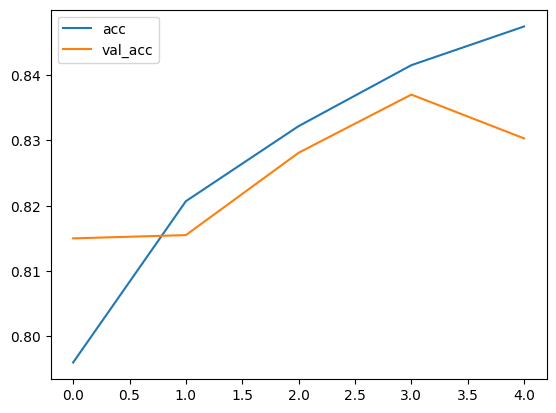

In [10]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

313/313 [==============================] - 1s 4ms/step
[[933  10  32   3   1   0   3   6   9   3]
 [  8 968   1   0   1   1   1   0   6  14]
 [ 54   3 804  21  26  14  53  17   3   5]
 [ 39   8  72 670  37  73  53  25   7  16]
 [ 27   3  65  29 776   7  48  39   2   4]
 [ 20   6  67 115  28 693  30  38   1   2]
 [ 12   5  31  26  10   1 909   4   1   1]
 [ 27   4  24  21  32   5   7 874   0   6]
 [111  33   6   2   1   1   4   0 831  11]
 [ 33 107   0   4   0   0   4   2   5 845]]


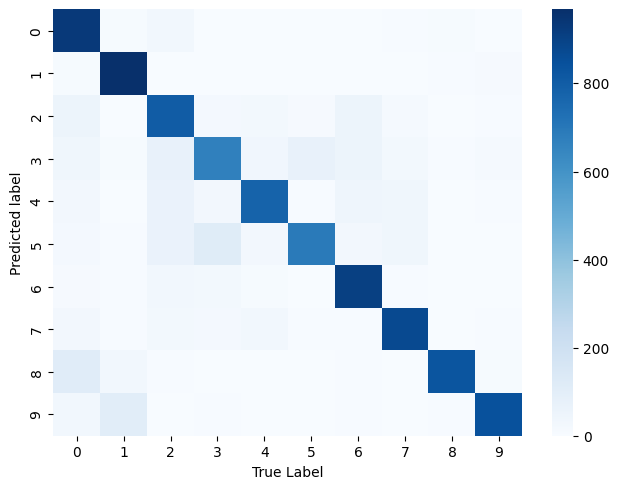

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

p_test = model.predict(x_test).argmax(axis=1)
con = confusion_matrix(y_test, p_test)
print(con)
sns.heatmap(con, cmap='Blues')
plt.tight_layout()
plt.xlabel('True Label')
plt.ylabel('Predicted label')
plt.show()

Text(0.5, 1.0, 'True label: 5 Predicted: 3')

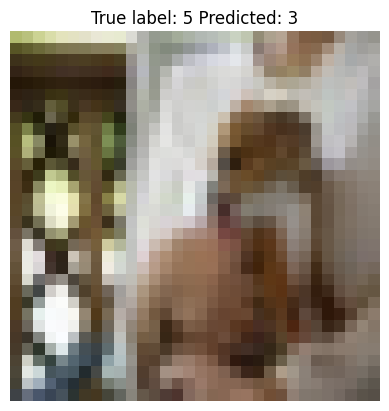

In [20]:
# Show misclassified examples
misclass_id = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_id)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.imshow(x_test[i], cmap='gray')
plt.axis('off')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))